In [9]:
# %run code/add_data.py
import numpy as np
import pandas as pd
import json
import requests
import os

os.system("ls data/zippedData | grep sv > file_list.txt")


import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline


In [10]:
with open ('file_list.txt', 'r') as f:
    file_list= f.readlines()
    
csv_dict = {}

for csv in file_list:
    file='data/ZippedData/'+csv.strip()
    df_name=csv.strip()
    if 'csv' in file:
        df_name=df_name.split('.csv.gz')[0]
        df=pd.read_csv(file, compression='gzip')
    elif 'tsv' in file:
        df_name=df_name.split('.tsv.gz')[0]
        df=pd.read_csv(file, compression='gzip', delimiter='\t', encoding='latin-1')
    else: print(file, ": unkown file!")
    csv_dict[df_name] = df


    
#df=pd.read_csv("rt.movie_info.tsv.gz", compression='gzip', delimiter='\t', encoding='latin-1')


In [13]:
print(csv_dict.keys())
#print(tsv_dict.keys())

#csv_dict.get("tmdb_movie_ids") # has list of 330000 tmdb ids, titles, popularity
#csv_dict.get("bom.movie_gross") # has key title: values <studio>, gross, year

#csv_dict.get("imdb.name.basics").head() # name of a person and lists of production, profession and title 
#csv_dict.get("imdb.title.principals").head() # similar name.basics, but has explicit category, as well as details for actors

#csv_dict.get("imdb.title.akas").head() # title id and <title for different regions if needed> 
#csv_dict.get("imdb.title.basics")# has key title, values: genres, length, future year
#csv_dict.get("imdb.title.ratings").head() # # tittle_id, averagerating, numvotes

#csv_dict.get("imdb.title.crew").head() # # LOOKUP TABLE can be joined with name_basics and movie basics 


#csv_dict.get("tmdb.movies") # TMDB tittle_id, averagerating, numvotes, list of genres, original lang, populatrity
#csv_dict.get("imdb.title.ratings").head() # #IMDB tittle_id, averagerating, numvotes

#csv_dict.get("tn.movie_budgets") # #tn title, date, budget and gross

#tsv_dict.get("rt.reviews")# #reviews probably can joined with rt.movie_info on id

csv_dict["tmdb_imdb_gross_full"]# #reviews probably can joined with rt.movie_info on id
#len(csv_dict["tmdb_imdb_gross"][csv_dict["tmdb_imdb_gross"]["budget"]==0])

dict_keys(['bom.movie_gross', 'imdb.name.basics', 'imdb.title.akas', 'imdb.title.basics', 'imdb.title.crew', 'imdb.title.principals', 'imdb.title.ratings', 'rt.movie_info', 'rt.reviews', 'tmdb.movies', 'tmdb_genres', 'tmdb_imdb_gross', 'tmdb_imdb_gross_full', 'tmdb_movie_ids', 'tn.movie_budgets'])


,Unnamed: 0,id,tconst,title,release_date,revenue,budget,vote_average,popularity,vote_count,runtime,genres
0,0.0,6124,tt0011436,"Peter Voss, Thief of Millions",1921-01-01,0,0,0.0,0.6,0,420,[12]
1,NaN,id,tconst,title,release_date,revenue,budget,vote_average,popularity,vote_count,runtime,genres
2,0.0,25449,NaN,New World Disorder 9: Never Enough,2008-12-08,0,0,6.0,1.4,3,69,[]
3,1.0,2,tt0094675,Ariel,1988-10-21,0,0,6.8,9.654,155,73,"[18, 80, 35]"
4,2.0,5,tt0113101,Four Rooms,1995-12-09,4257354,4000000,5.7,15.698,2123,98,"[80, 35]"
...,...,...,...,...,...,...,...,...,...,...,...,...
330361,85.0,913450,tt0089532,Madre in Japan,NaN,0,0,0.0,0.6,0,0,[]
330362,86.0,913454,NaN,Tonight`s Homework,NaN,0,0,0.0,0.6,0,0,[]
330363,87.0,913456,NaN,REPLICA,2020-07-07,0,0,10.0,0.65,1,5,[878]
330364,88.0,913458,NaN,Journey to the West: Kingdom of Women,2016-09-20,0,0,0.0,0.6,0,77,[]


In [14]:
def gross_to_num(gross_str):
    try:
        gross_num=float(gross_str.replace('$','').replace(',',''))
        
    except:
        return np.NaN
    else:
        return gross_num

In [15]:
csv_dict["tmdb_imdb_gross"].loc[csv_dict["tmdb_imdb_gross"]["revenue"]<0,:]

,Unnamed: 0,Unnamed: 0.1,id,tconst,release_date,revenue,budget
15069,15069,15069,339294,NaN,2013-05-15,-12,12


In [16]:
#csv_dict["bom.movie_gross"]["domestic_gross"].notna().sum()

In [17]:
# prepairing gross columns in tn.movie_budgets, tmbdb_imdb_gross, and bom.movie_gross
csv_dict["tn.movie_budgets"]["worldwide_gross_num"]=csv_dict["tn.movie_budgets"]["worldwide_gross"].apply(gross_to_num)
csv_dict["tn.movie_budgets"]["production_budget_num"]=csv_dict["tn.movie_budgets"]["production_budget"].apply(gross_to_num)

csv_dict["tmdb_imdb_gross"]["gross"]=csv_dict["tmdb_imdb_gross"]["revenue"] -csv_dict["tmdb_imdb_gross"]["budget"]

csv_dict["bom.movie_gross"]["foreign_gross_fixed"]=csv_dict["bom.movie_gross"].loc[:,"foreign_gross"].apply(gross_to_num)
csv_dict["bom.movie_gross"]["foreign_gross_fixed"].replace(np.NaN,0, inplace=True)
csv_dict["bom.movie_gross"]["domestic_gross"].replace(np.NaN,0, inplace=True)
csv_dict["bom.movie_gross"]["total_gross"]=csv_dict["bom.movie_gross"]["domestic_gross"] + csv_dict["bom.movie_gross"]["foreign_gross_fixed"]
#csv_dict["bom.movie_gross"].info()

In [18]:

def extract_year(year_string):
    if ',' in year_string:
        return year_string.split(',')[1].strip()
    else:
        return(year_string)

csv_dict.get("tn.movie_budgets")["release_date"]=csv_dict.get("tn.movie_budgets")["release_date"].apply(extract_year)
csv_dict["tmdb_imdb_gross"]["release_date"]=csv_dict["tmdb_imdb_gross"]["release_date"].map(lambda x: str(x)[0:4])
csv_dict["bom.movie_gross"]["year"]=csv_dict["bom.movie_gross"]["year"].map(lambda x: str(x))  


In [19]:

# merging 3 tables: tmdb_imdb_gross, imdb.title.basics, tn.movie_budgets

merged_df=csv_dict["imdb.title.basics"].merge(csv_dict["tmdb_imdb_gross"][["tconst","gross","release_date"]], \
                                              on='tconst', how='outer')

merged1_df=merged_df.merge(csv_dict.get("tn.movie_budgets")[["movie", "production_budget", "worldwide_gross_num", "release_date" ]], \
                           left_on=['primary_title','release_date'], right_on=["movie","release_date"], how="left")

merged2_df=merged1_df.merge(csv_dict.get("bom.movie_gross")[["title","total_gross","year"]], \
                            left_on=['primary_title','release_date'], right_on=["title","year"], how="left")




In [20]:
merged2_df["gross"].replace(0,np.NaN, inplace=True)
merged2_df["worldwide_gross_num"].replace(0,np.NaN, inplace=True)
merged2_df["total_gross"].replace(0,np.NaN, inplace=True)
#merged2_df["worldwide_gross_num"].notna().sum()


In [27]:

merged2_df.head()

,tconst,primary_title,runtime_minutes,production_budget,title,total_gross,year,genre
2,tt0069049,The Other Side of the Wind,122.0,NaN,The Other Side of the Wind,-12000000.0,2018,[Drama]
17,tt0192528,Heaven & Hell,104.0,NaN,Heaven & Hell,-5000000.0,2018,[Drama]
20,tt0249516,Foodfight!,91.0,"$45,000,000",Foodfight!,-64926294.0,2012,"[Action, Animation, Comedy]"
23,tt0255820,Return to Babylon,75.0,NaN,Return to Babylon,-2000000.0,2013,"[Biography, Comedy, Drama]"
30,tt0285252,Life's a Beach,100.0,NaN,Life's a Beach,-4000000.0,2010,[Comedy]


In [22]:

merged2_df["total_gross"].fillna(merged2_df["gross"], inplace=True)
merged2_df["total_gross"].fillna(merged2_df["worldwide_gross_num"], inplace=True)
merged2_df["title"].fillna(merged2_df["primary_title"], inplace=True)
merged2_df["title"].fillna(merged2_df["movie"], inplace=True)
merged2_df["year"].fillna(merged2_df["release_date"], inplace=True)
merged2_df["year"].fillna(merged2_df["start_year"], inplace=True)


merged2_df.dropna(subset=["total_gross"], inplace=True)
#len(merged2_df.loc[merged2_df["worldwide_gross_num"].notna(),:]["tconst"].unique())

columns=["original_title","start_year","gross", "release_date","movie", "worldwide_gross_num"]
merged2_df.drop(columns=columns, inplace=True)


#merged2_df["total_gross"].notna().sum()
#merged3_df

In [23]:
merged2_df["total_gross"].notna().sum()

5953

In [24]:

merged2_df["genre"]=merged2_df['genres'].str.split(',')
merged2_df.drop(columns='genres', inplace=True)


sep_genre_df=merged2_df.explode('genre')

In [25]:





#len(merged2_df)

In [26]:
sep_genre_df

,tconst,primary_title,runtime_minutes,production_budget,title,total_gross,year,genre
2,tt0069049,The Other Side of the Wind,122.0,NaN,The Other Side of the Wind,-12000000.0,2018,Drama
17,tt0192528,Heaven & Hell,104.0,NaN,Heaven & Hell,-5000000.0,2018,Drama
20,tt0249516,Foodfight!,91.0,"$45,000,000",Foodfight!,-64926294.0,2012,Action
20,tt0249516,Foodfight!,91.0,"$45,000,000",Foodfight!,-64926294.0,2012,Animation
20,tt0249516,Foodfight!,91.0,"$45,000,000",Foodfight!,-64926294.0,2012,Comedy
...,...,...,...,...,...,...,...,...
154800,tt2490004,NaN,NaN,NaN,NaN,-8000000.0,2014,NaN
154804,tt1961512,NaN,NaN,NaN,NaN,-2000.0,2011,NaN
154850,tt2374564,NaN,NaN,NaN,NaN,-50.0,2012,NaN
154856,tt5472372,NaN,NaN,NaN,NaN,-2000000.0,2016,NaN


In [68]:
None

In [71]:
summary_df=sep_genre_df.groupby(['genre'], as_index=False).mean().sort_values(by="total_gross", ascending=False)[['genre','total_gross']]
#summary_df=summary_df.loc[:22]
summary_df

,genre,total_gross
1,Adventure,238238251.2391453
17,Sci-Fi,230432706.8912371
9,Fantasy,187477663.0727273
2,Animation,186855587.7947598
13,Musical,164575389.6521739
0,Action,152099254.2897468
8,Family,123465018.7421384
4,Comedy,74279501.3386953
19,Thriller,64888749.1452830
21,Western,62343870.4500000


In [72]:
None

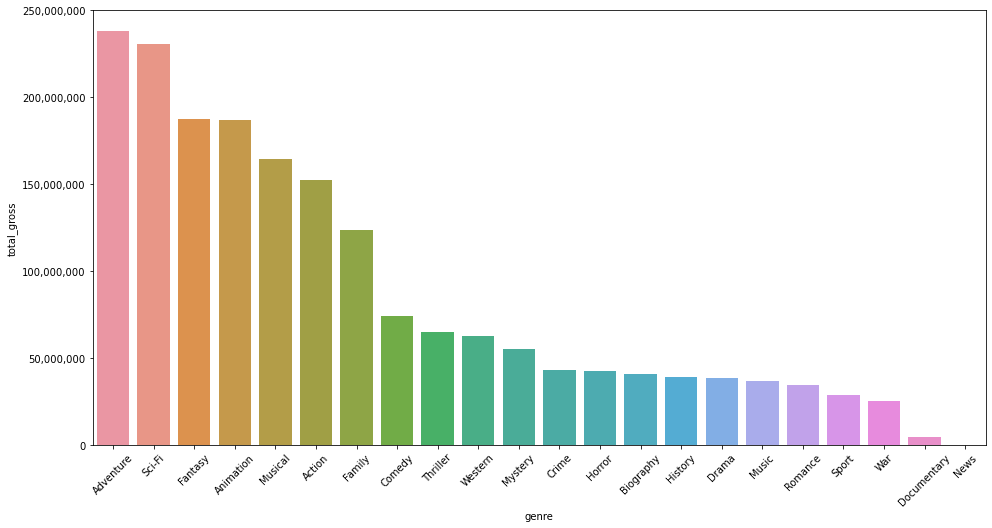

In [73]:
pd.set_option('display.float_format', lambda x: '%.7f' % x)

num_of_ticks=list(range(len(summary_df['genre'])))

fig,ax=plt.subplots(  figsize=(16,8))


ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#ax.xticks(rotation=45)
#sns.barplot(x='genre', y='total_gross', data=summary_df.sort_values(by='total_gross', ascending=False), ax=ax );
sns.barplot(x='genre', y='total_gross', data=summary_df, ax=ax);
ax.set_xticks(num_of_ticks);
ax.set_xticklabels(list(summary_df['genre']),  rotation=45);


In [148]:
year_summary_df=merged2_df.groupby(['year'], as_index=False).mean().sort_values(by="year")[['year','total_gross']]
year_summary_df=year_summary_df.loc[35:,:]
year_summary_df

,year,total_gross
35,2000,57746266.0000000
36,2001,191320740.6666667
37,2002,133612991.3333333
38,2004,150431406.0000000
39,2005,46386773.0000000
40,2006,95654871.3333333
41,2007,221721269.0000000
42,2008,25379056.5833333
43,2009,79145263.3809524
44,2010,67289971.7989556


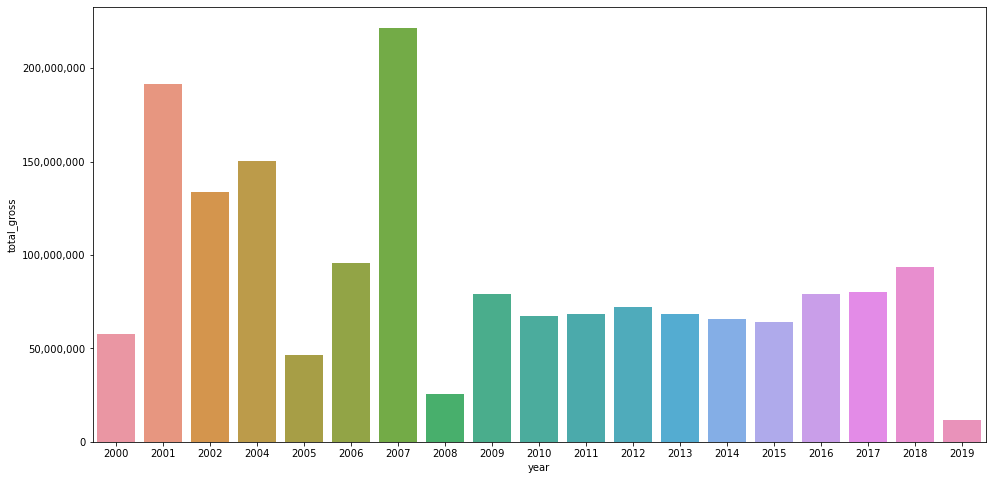

In [149]:


fig,ax=plt.subplots(  figsize=(16,8))
import seaborn as sns

ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#ax.xticks(rotation=45)
#sns.barplot(x='genre', y='total_gross', data=summary_df.sort_values(by='total_gross', ascending=False), ax=ax );
sns.barplot(x='year', y='total_gross', data=year_summary_df, ax=ax);


In [150]:
type_info = csv_dict['rt.movie_info'][['id', 'director', 'runtime', 'rating']]



name_key = csv_dict['imdb.name.basics'][['nconst', 'primary_name']]
rt2_df = rt_df.merge(name_key, left_on = 'director', right_on = 'primary_name')













In [159]:
rt_reviews_cleaned = csv_dict['rt.reviews'][['id', 'rating']]  #, 'critic']]
rt_reviews_info = csv_dict['rt.movie_info'][['id', 'director', 'runtime', 'rating']]

rt_df = rt_reviews_info.merge(rt_reviews_cleaned, how = 'inner', on = 'id')


In [160]:
rt_df.head(1)

,id,director,runtime,rating_x,rating_y
0,3,David Cronenberg,108 minutes,R,3/5


In [161]:
#ADDING DIRECTOR NAME TO rt_df
name_key = csv_dict['imdb.name.basics'][['nconst', 'primary_name']]
rt2_df = rt_df.merge(name_key, left_on = 'director', right_on = 'primary_name')
#rt_df2 = rt_df.drop(columns = ['primary_name'])
rt2_df.head()

,id,director,runtime,rating_x,rating_y,nconst,primary_name
0,3,David Cronenberg,108 minutes,R,3/5,nm0000343,David Cronenberg
1,3,David Cronenberg,108 minutes,R,NaN,nm0000343,David Cronenberg
2,3,David Cronenberg,108 minutes,R,NaN,nm0000343,David Cronenberg
3,3,David Cronenberg,108 minutes,R,NaN,nm0000343,David Cronenberg
4,3,David Cronenberg,108 minutes,R,NaN,nm0000343,David Cronenberg


In [126]:
rt2_df

#
#################################################
movie_director_code = csv_dict['imdb.title.crew'][['tconst', 'directors']]
movie_id_names_time = csv_dict['imdb.title.basics'][['tconst', 'primary_title']] #,'original_title', 'runtime_minutes']]

rt_df2 = movie_id_names_time.merge(movie_director_code, how = 'inner', on = 'tconst')

type_move_df=rt_df.merge(merged2_df[["tconst","total_gross"]], on='tconst')

####################################################



In [130]:
csv_dict['imdb.title.basics']


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0000000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0000000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0000000,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0000000,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0000000,NaN


In [ ]:

#rt_df.dropna(subset=['rating_y'],inplace=True)
#rt_df['critic_rating'] = rt_df['rating_y'].apply(norm_ratings)


## rt_df.dropna(subset=['runtime'],inplace=True)
## rt_df['runtime'] = rt_df['runtime'].apply(clean_runtime)

## rt_df.drop(columns='rating_y', inplace=True)

In [503]:
#type_move_df = csv_dict['imdb.title.crew'][['tconst', 'directors']]
#type_move_df['director'] = type_move_df['directors'].str.split(',')
#type_move_df.drop(columns = 'directors', inplace = True)
#type_move_df = type_move_df.explode('director')


#movie_id_names_time = csv_dict['imdb.title.basics'][['tconst', 'primary_title','original_title', 'runtime_minutes']]




#imdb_crew_basics = movie_id_names_time.merge(type_move_df, how = 'inner', on = 'tconst')



In [ ]:
def norm_ratings(rating):
    grades = {"A":10,"B":8,"C":6,"D":4,"F":2,"A+":10,"B+":9,"C+":7,"D+":5,\
              "F+":3,"A-":9,"B-":7,"C-":5,"D-":3,"F-":0, '3 1/2': 3.5, 'T': None, 'N': None, 'R': None}
    
    if rating in grades.keys():
        norm=grades[rating]
        return norm
    elif ('/') in rating:
        r = rating.split('/')
        norm = float(r[0])/float(r[1])*10
        return norm
    elif ('-') in rating and len(rating) > 2:
        r = rating.split('-')
        norm = float(r[0])/float(r[1])*10
        return norm
    else:
        norm = float(rating)
        return norm


    
def clean_runtime(runtime):
   minutes = runtime.split()[0]
   return int(minutes)

def float_conv(flt):
    integer = int(flt)
    return integer

In [504]:


imdb_crew_basics.dropna(subset=['runtime_minutes'],inplace=True)
imdb_crew_basics['runtime_minutes'] = imdb_crew_basics['runtime_minutes'].apply(float_conv)




In [506]:
rt_df.head()

,id,director,runtime,rating_x,critic,critic_rating,nconst
0,3,David Cronenberg,108,R,PJ Nabarro,6.0,nm0000343
1,3,David Cronenberg,108,R,Eric D. Snider,6.0,nm0000343
2,3,David Cronenberg,108,R,Matt Kelemen,4.0,nm0000343
3,3,David Cronenberg,108,R,Emanuel Levy,7.0,nm0000343
4,3,David Cronenberg,108,R,Christian Toto,5.0,nm0000343


In [507]:
# test = rt_df.merge(imdb_crew_basics , left_on = ['runtime', 'nconst'], right_on = ['runtime_minutes', 'director'])

combined_df = rt_df.merge(imdb_crew_basics, left_on = ['runtime', 'nconst'], right_on = ['runtime_minutes', 'director'])



In [118]:
None

In [120]:
None

In [512]:
critic_gross_df=combined_df.merge(merged2_df[["tconst","total_gross"]], on='tconst')

67